# Challenge: Boston Marathon

The [data](https://github.com/llimllib/bostonmarathon) contains information on the Boston Marathon results from the year 2014. It was collected from [BAA.org](https://BAA.org).  
It has 21 columns and 31984 observations. 

In [60]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('results.csv')

In [5]:
df.shape

(31984, 21)

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


# Exploration and Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [16]:
df = df.drop(['name', 'ctz', 'country', 'bib', 'state', 'city'], axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31649 entries, 0 to 31983
Data columns (total 15 columns):
10k          31649 non-null float64
division     31649 non-null int64
25k          31649 non-null float64
gender       31649 non-null object
age          31649 non-null int64
official     31649 non-null float64
genderdiv    31649 non-null int64
35k          31649 non-null float64
overall      31649 non-null int64
pace         31649 non-null float64
30k          31649 non-null float64
5k           31649 non-null float64
half         31649 non-null float64
20k          31649 non-null float64
40k          31649 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 3.9+ MB


In [56]:
#for i in range(len(df)):
#    q = float(df['25k'][i])
#   print(i, df['25k'][i])

In [21]:
df['10k'][3189]

'-'

In [52]:
len(df[df['40k'] == '-'])

6

In [45]:
# Drop blank times for 5K
df = df[df['5k'] != '-']
df['5k'] = df['5k'].astype('float64')

In [53]:
# Drop blank times for 40K
df = df[df['40k'] != '-']
df['40k'] = df['40k'].astype('float64')

In [51]:
# Drop blank times for 20k
df = df[df['20k'] != '-']
df['20k'] = df['20k'].astype('float64')

In [48]:
# Drop blank times for half
df = df[df['half'] != '-']
df['half'] = df['half'].astype('float64')

In [42]:
# Drop blank times for 30K
df = df[df['30k'] != '-']
df['30k'] = df['30k'].astype('float64')

In [37]:
# Drop blank times for 35K
df = df[df['35k'] != '-']
df['35k'] = df['35k'].astype('float64')

In [29]:
# Drop blank times for 25K
df = df[df['25k'] != '-']
df['25k'] = df['25k'].astype('float64')

In [23]:
# Drop blank times for 10K
df = df[df['10k'] != '-']
df['10k'] = df['10k'].astype('float64')

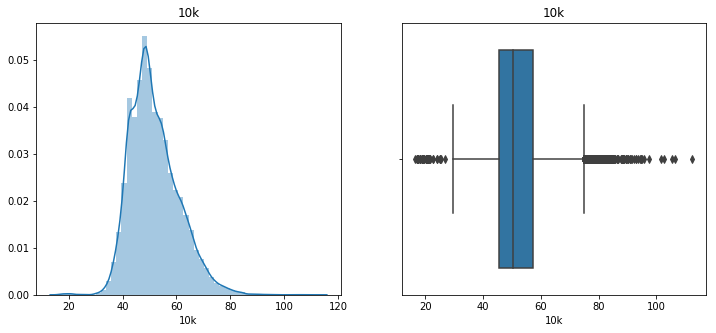

In [24]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['10k'])
plt.title('10k')

plt.subplot(1, 2, 2)
sns.boxplot(df['10k'])
plt.title('10k')

plt.show()

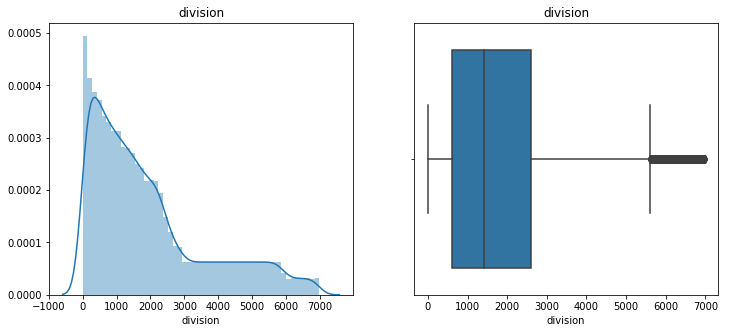

In [25]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['division'])
plt.title('division')

plt.subplot(1, 2, 2)
sns.boxplot(df['division'])
plt.title('division')

plt.show()

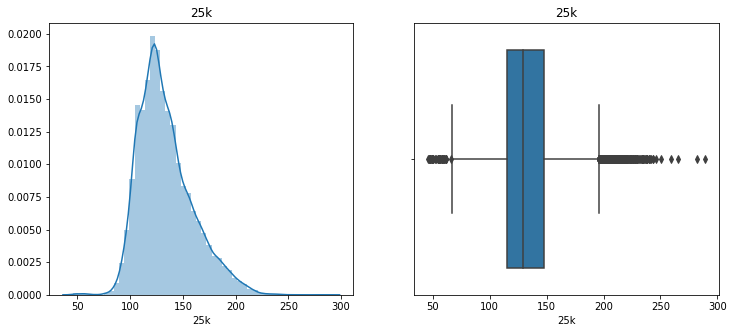

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['25k'])
plt.title('25k')

plt.subplot(1, 2, 2)
sns.boxplot(df['25k'])
plt.title('25k')

plt.show()

In [58]:
df['gender'] = np.where(df['gender'] == 'M', 0, 1)

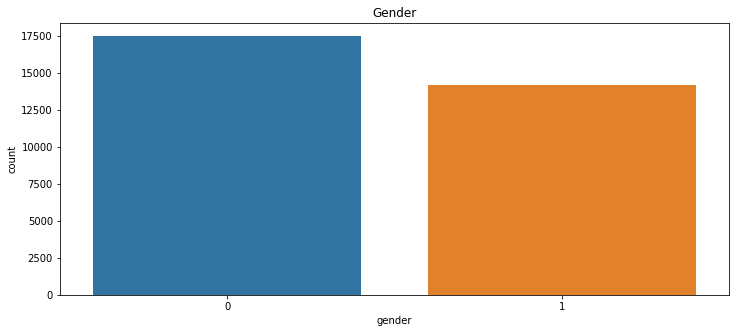

In [59]:
plt.figure(figsize=(12,5))
sns.countplot(x="gender", data=df);
plt.title('Gender')


plt.show()

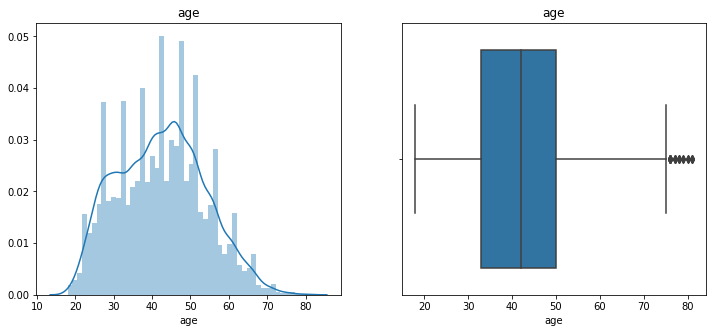

In [33]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['age'])
plt.title('age')

plt.subplot(1, 2, 2)
sns.boxplot(df['age'])
plt.title('age')

plt.show()

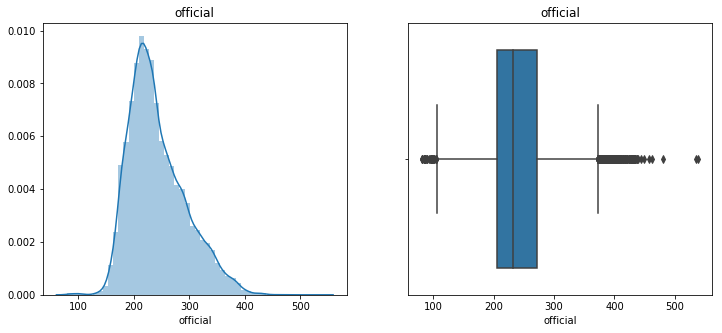

In [34]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['official'])
plt.title('official')

plt.subplot(1, 2, 2)
sns.boxplot(df['official'])
plt.title('official')

plt.show()

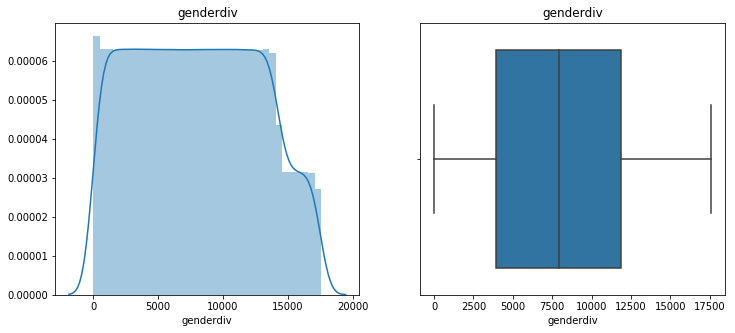

In [35]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['genderdiv'])
plt.title('genderdiv')

plt.subplot(1, 2, 2)
sns.boxplot(df['genderdiv'])
plt.title('genderdiv')

plt.show()

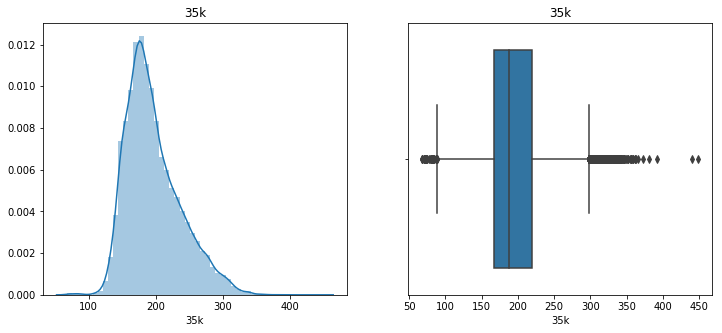

In [38]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['35k'])
plt.title('35k')

plt.subplot(1, 2, 2)
sns.boxplot(df['35k'])
plt.title('35k')

plt.show()

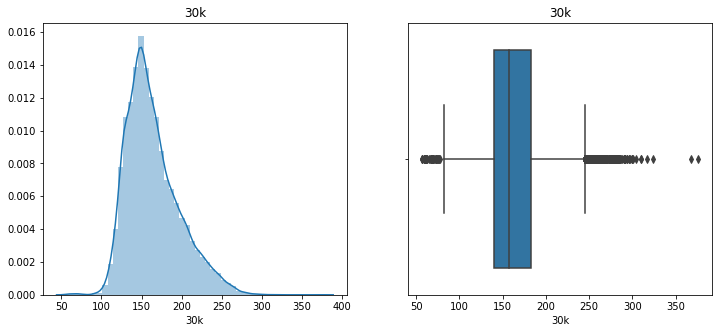

In [43]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['30k'])
plt.title('30k')

plt.subplot(1, 2, 2)
sns.boxplot(df['30k'])
plt.title('30k')

plt.show()

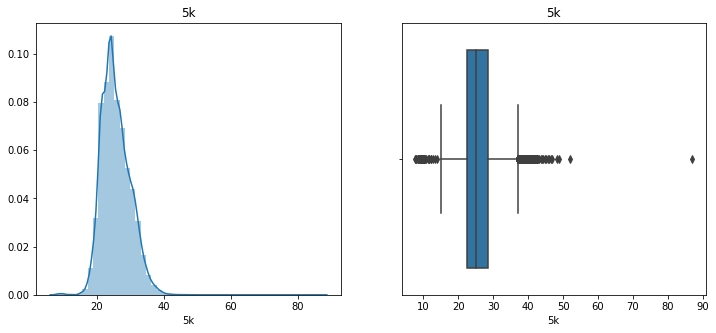

In [46]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['5k'])
plt.title('5k')

plt.subplot(1, 2, 2)
sns.boxplot(df['5k'])
plt.title('5k')

plt.show()

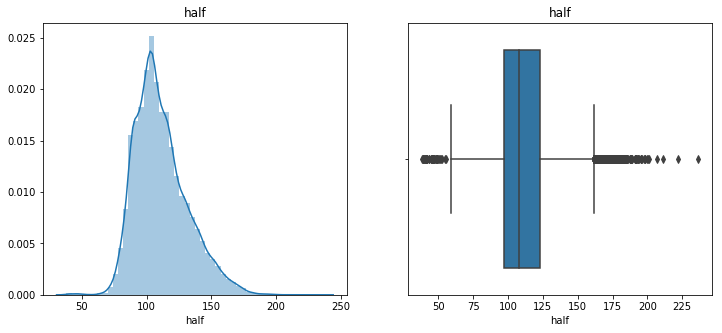

In [49]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['half'])
plt.title('half')

plt.subplot(1, 2, 2)
sns.boxplot(df['half'])
plt.title('half')

plt.show()

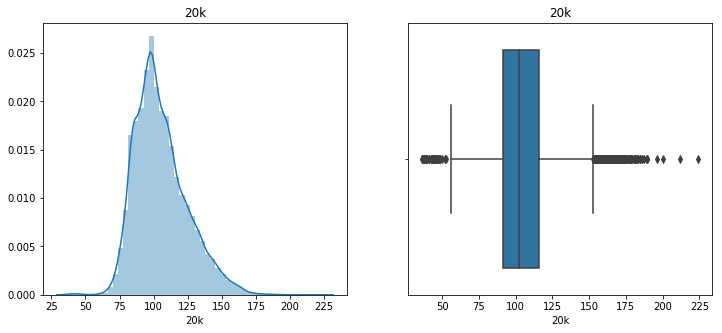

In [54]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['20k'])
plt.title('20k')

plt.subplot(1, 2, 2)
sns.boxplot(df['20k'])
plt.title('20k')

plt.show()

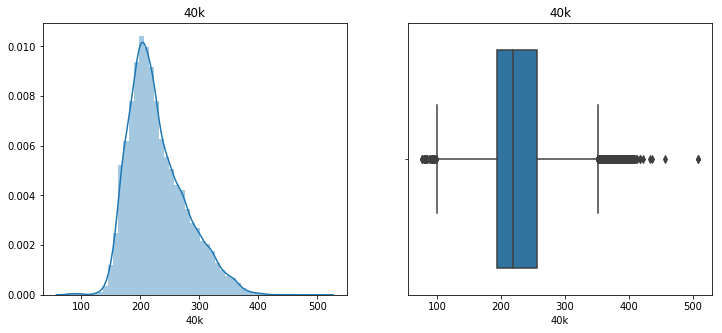

In [55]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['40k'])
plt.title('40k')

plt.subplot(1, 2, 2)
sns.boxplot(df['40k'])
plt.title('40k')

plt.show()

In [61]:
#normalize the data 
df_norm = normalize(df)

# Modeling

In [63]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=3).fit_predict(df_norm)

In [65]:
df['cluster'] = y_pred

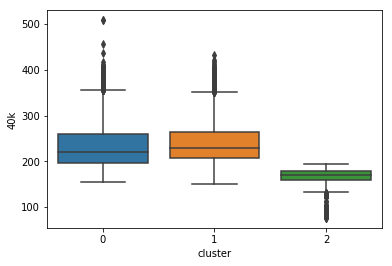

In [67]:
sns.boxplot(x="cluster", y="40k", data=df)
plt.show()

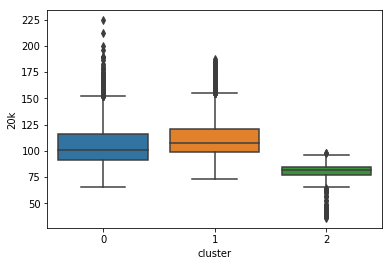

In [68]:
sns.boxplot(x="cluster", y="20k", data=df)
plt.show()

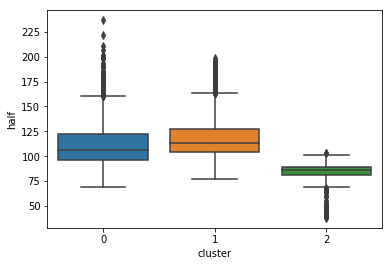

In [69]:
sns.boxplot(x="cluster", y="half", data=df)
plt.show()

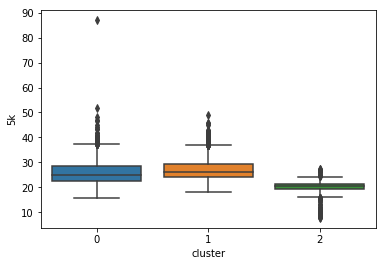

In [70]:
sns.boxplot(x="cluster", y="5k", data=df)
plt.show()

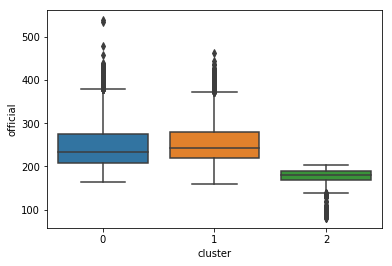

In [71]:
sns.boxplot(x="cluster", y="official", data=df)
plt.show()

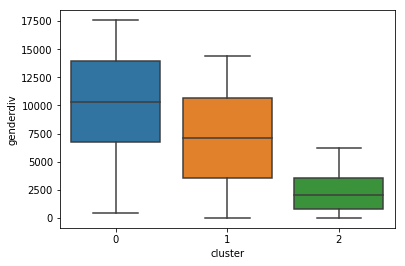

In [72]:
sns.boxplot(x="cluster", y="genderdiv", data=df)
plt.show()

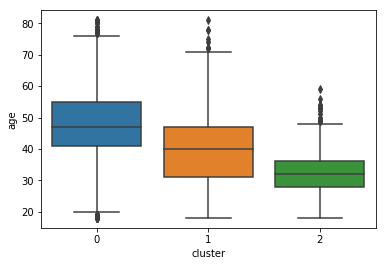

In [73]:
sns.boxplot(x="cluster", y="age", data=df)
plt.show()

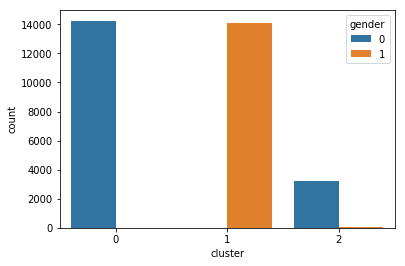

In [75]:
sns.countplot(x="cluster", hue="gender", data=df)
plt.show()

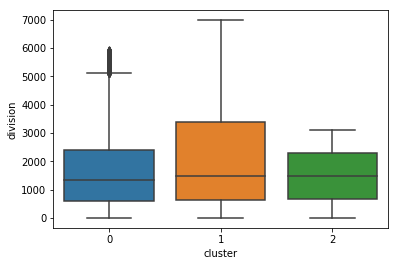

In [76]:
sns.boxplot(x="cluster", y="division", data=df)
plt.show()

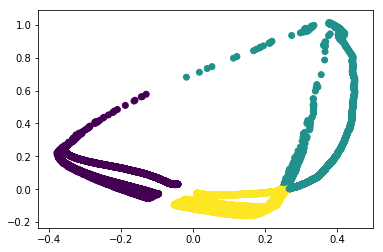

In [62]:
#See what it looks like with 2 deminsions 
X_pca = PCA(2).fit_transform(df_norm)

# Calculate predicted values.
y_pred_pca = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca)
plt.show()

# Conclusion

The model clustered the data into the following 3 groups:
group 0 - men
group 1 - women 
group 2 - elite runners, mixed gender